<a href="https://colab.research.google.com/github/jpbezerra/tiktok-analysis/blob/main/tiktok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TO-DO
- talvez fazer gráficos com os testes de hipotese (usar seaborn ou plt, tentar ver como preencher uma regiao de um grafico em alguma dessas duas libs)

# SETTINGS

In [376]:
# imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as st
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [377]:
# configurations

data_path = "./user_data_tiktok.json"

my_colors = [
    "#E83E3E", "#E88929", "#ECDF2F", "#7BEC2F",
    "#30C986", "#1FC1B7", "#1CDDFA", "#298CBD",
    "#1382F2", "#1347F2", "#936DD4", "#DF37F2"
]

months_name = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]

hours_name = [f"{x}h" for x in range(24)]

days_name = [f"{day}" for day in range(1, 32)]

significance = 0.05

font_size = 7

In [378]:
# creating Data class

class Data:
    data_json_path = data_path

    def __init__(self) -> None:
        self.data = pd.read_json(data_path)

        self.activity = self.data["Activity"]
        self.ads = self.data['Ads and data']
        self.comments = self.data['Comment']
        self.messages = self.data['Direct Messages']

        self.guard = {}

In [379]:
# defining auxiliary functions

def months_and_hours_review(data: np.ndarray, y: str, title: str, target_label='Date', return_data=True) -> list[np.ndarray] | None:
    months = np.zeros(12, dtype=int)
    hours = np.zeros(24, dtype=int)

    for label in data:
        date, time = label[target_label].split(' ')

        months[int(date.split('-')[1]) - 1] += 1
        hours[int(time.split(':')[0])] += 1

    # barplot of date
    plt.bar(
        x=months_name,
        height=months,
        color=my_colors
    )

    plt.xlabel("Months")
    plt.ylabel(f"Amount of {y}")
    plt.title(f"Relation between months and {title}")
    plt.xticks(fontsize=font_size)
    plt.grid()
    plt.show()

    # barplot of time
    plt.bar(
        x=hours_name,
        height=hours,
        color=my_colors
    )

    plt.xlabel("Hours")
    plt.ylabel(f"Amount of {y}")
    plt.title(f"Relation between hours and {title}")
    plt.xticks(fontsize=font_size)
    plt.grid()
    plt.show()

    if return_data:
        return [months, hours]

def pie_review(data : np.ndarray, target_label : str, title : str) -> None:
    information : dict[str, int] = {}

    for info in data:
        target = info[target_label]

        try:
            information[target] += 1

        except KeyError:
            information[target] = 1

    temp : dict[str, int] = information.copy()

    for key, value in temp.items():
        if 15 > value:
            try:
                information['Others'] += value

            except KeyError:
                information['Others'] = value

            finally:
                information.pop(key)

    plt.pie(
        x=information.values(), labels=information.keys(), autopct='%1.1f%%', colors=my_colors,
        pctdistance=0.80
    )

    plt.title(f"Percentage of {title}")
    plt.show()

def unique(data : np.ndarray, target_label : str) -> np.ndarray:
    result : np.ndarray = np.array([])

    for info in data:
        result = np.append(result, info[target_label])

    return np.unique(result)

def line_review(data : np.ndarray, target_label : str, title : str) -> None:
    days : np.ndarray = np.zeros(31, dtype=int)

    for info in data:
        days[int(info[target_label].split(' ')[0].split('-')[2]) - 1] += 1

    plt.plot(days_name, days, marker='o')
    plt.title(f"Relation between days and {title}")
    plt.xticks(fontsize=font_size)
    plt.grid()
    plt.xlabel("Days")

def get_measures(data : np.ndarray) -> dict:
    return {'Mean' : st.mean(data), 'Median' : st.median(data), 'SD' : st.stdev(data)}

def check_relation(first_data : np.ndarray, second_data : np.ndarray, first_label : str, second_label : str):
    plt.scatter(x=first_data, y=second_data)
    plt.xlabel(first_label)
    plt.ylabel(second_label)
    plt.grid()
    plt.show()

def hypotesis_analysis(statistics : float, p_value : float, coefficient : str):
    print(f"{coefficient} : {statistics:.4f}\nP-value : {p_value:.4f}")

    if p_value < significance:
        print("The null hypotesis is rejected\n")

    else:
        print("The null hypotesis is not rejected\n")

In [380]:
# creating the dataset

if __name__ == "__main__":
    data = Data()

# MESSAGES

## Setting data

In [381]:
# declaring variables

chat_history : dict[str, list] = data.messages['Chat History']['ChatHistory']

info : dict[str, int] = {}
measures_each_account : np.ndarray = np.array([])
account_names : np.ndarray = np.array([])

my_messages = np.array([])
other_messages = np.array([])

In [382]:
# getting data

for key, value in chat_history.items():
    if 10 > len(value):
        try:
            info['Others'] += len(value)

        except KeyError:
            info['Others'] = len(value)

    else:
        info[key.split(' ')[-1].split(':')[0]] = len(value)

    account_names = np.append(account_names, key)
    measures_each_account = np.append(measures_each_account, len(value))

    for subdata in value:
        if subdata['From'] == "jp__bezerra":
            my_messages = np.append(my_messages, subdata)

        else:
            other_messages = np.append(other_messages, subdata)

## Graphics

### Messages by acount

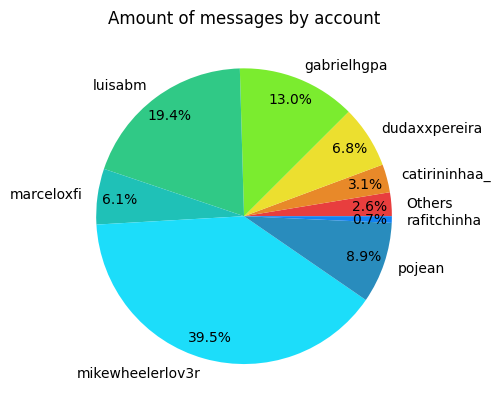

In [383]:
plt.pie(
    x=info.values(), labels=info.keys(), autopct='%1.1f%%', colors=my_colors,
    pctdistance=0.85
)

plt.title("Amount of messages by account")
plt.show()

### Messages sent by me

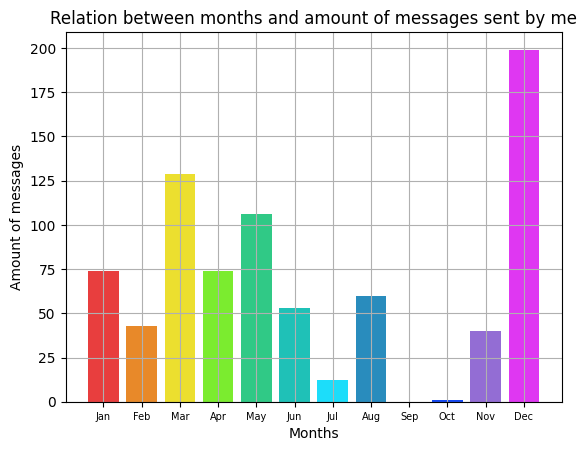

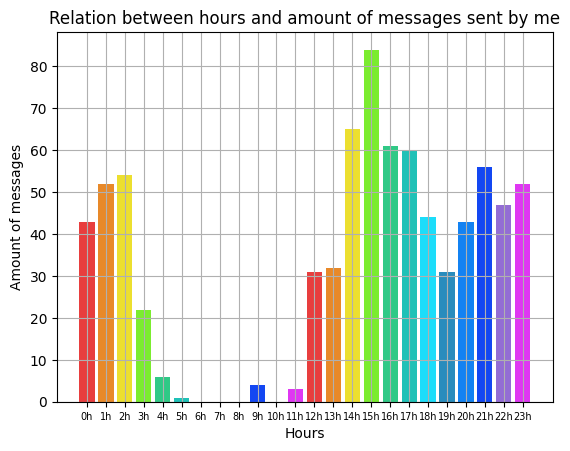

In [384]:
m_sent, h_sent = months_and_hours_review(my_messages, "messages", "amount of messages sent by me")

### Messages sent by other users

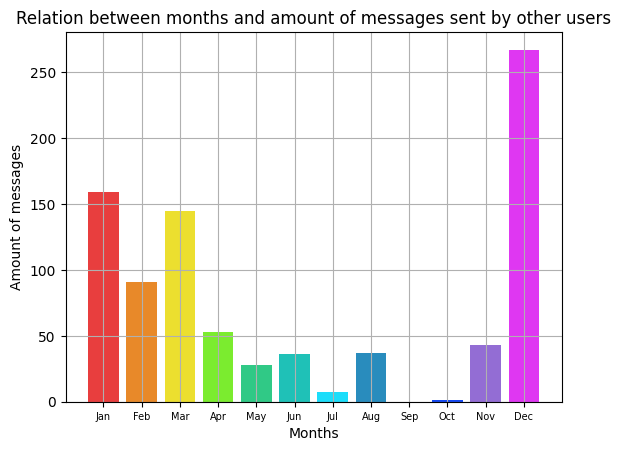

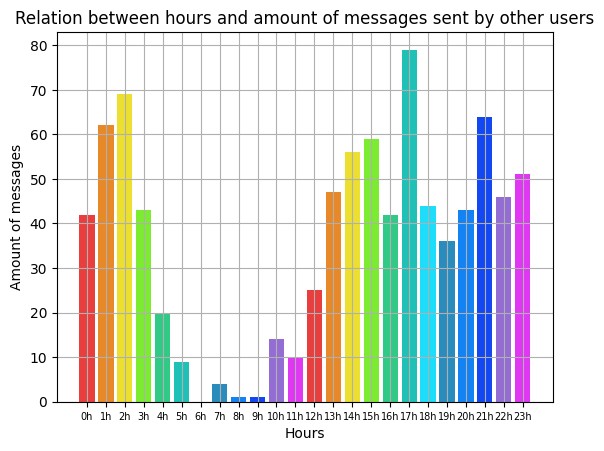

In [385]:
m_receive, h_receive = months_and_hours_review(other_messages, "messages", "amount of messages sent by other users")

### Chat with most messages

In [386]:
list_messages = list(info.values())
max_value = np.max(list_messages)
label_max = list(info.keys())[list_messages.index(max_value)]

print(f"With {max_value} messages, the person who I have most messages with is {label_max}")

With 655 messages, the person who I have most messages with is mikewheelerlov3r


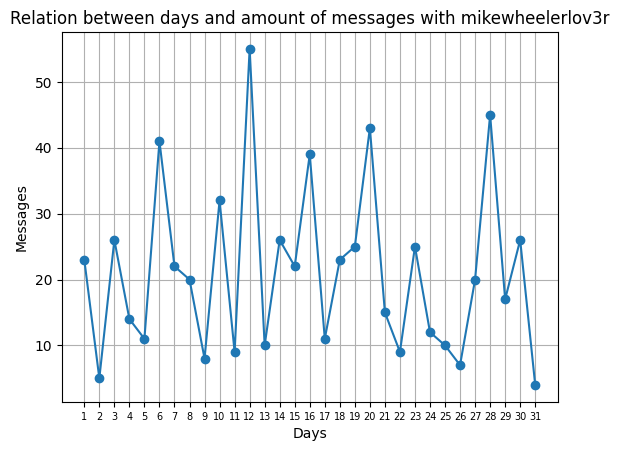

In [387]:
line_review(chat_history[f"Chat History with {label_max}:"], 'Date', f"amount of messages with {label_max}")
plt.ylabel("Messages")
plt.show()

## Measures

In [388]:
measures = get_measures(measures_each_account)
print(f"Mean : {measures['Mean']}\nMedian : {measures['Median']}\nStandard Deviation : {measures['SD']}")

Mean : 87.26315789473684
Median : 8.0
Standard Deviation : 163.49816244474133


## Storing data

In [389]:
# storing variables for later

data.guard['Messages'] = {'M' : [m_sent, m_receive], 'H' : [h_sent, h_receive]}

# COMMENTS

## Setting data

In [390]:
# declaring variables

comments = np.array(data.comments['Comments']['CommentsList'])

## Graphics

### Amount of comments

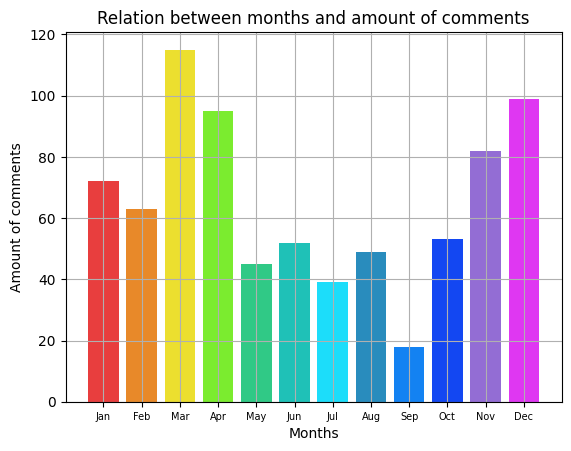

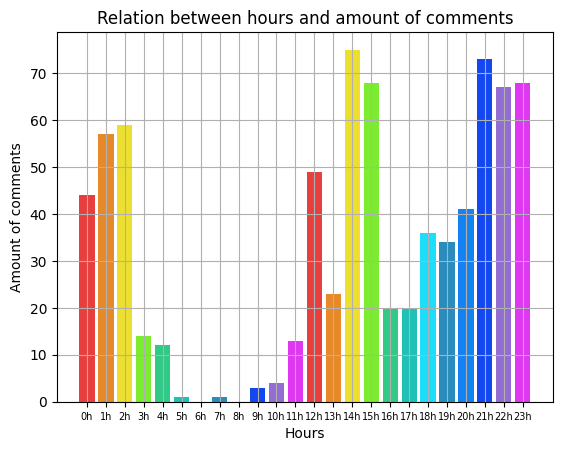

In [391]:
m_comments, h_comments = months_and_hours_review(comments, "comments", "amount of comments")

## Measures

In [392]:
sizes = np.array([])
for comment in comments:
    sizes = np.append(sizes, len(comment['Comment']))

print(f"I have an average of typing {np.mean(sizes):.2f} characters per comment")

I have an average of typing 12.63 characters per comment


## Storing data

In [393]:
# storing variables for later

data.guard['Comments'] = {'M' : m_comments, 'H' : h_comments}

# ACTIVITY

## Setting data

In [394]:
# declaring variables

fav_video_list = np.array(data.activity['Favorite Videos']['FavoriteVideoList'])
like_list = np.array(data.activity['Like List']['ItemFavoriteList'])
search_history = np.array(data.activity['Search History']['SearchList'])
share_history = np.array(data.activity['Share History']['ShareHistoryList'])
video_browsing_history = np.array(data.activity['Video Browsing History']['VideoList'])
login_history = np.array(data.activity['Login History']['LoginHistoryList'])

## Graphs

### Amount of favorites

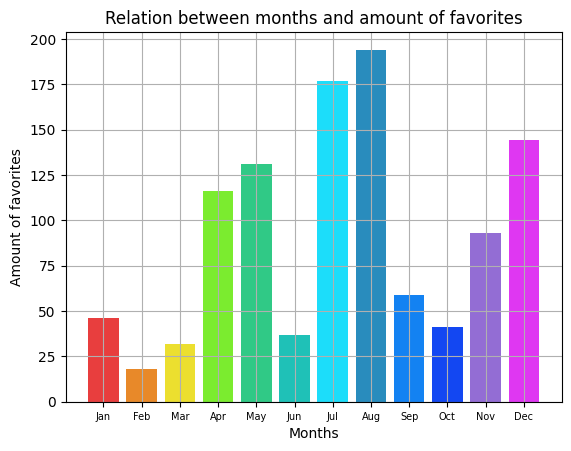

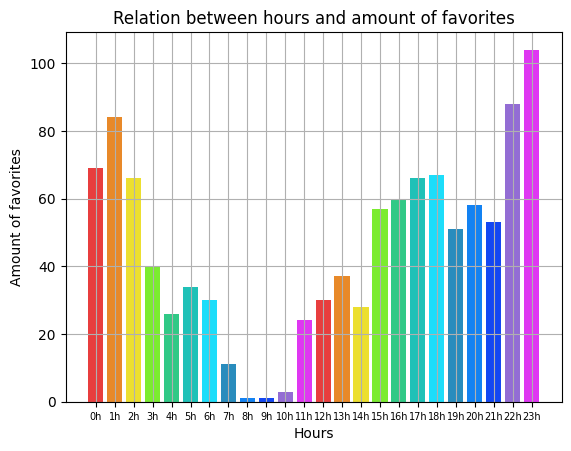

In [395]:
m_fav, h_fav = months_and_hours_review(fav_video_list, "favorites", "amount of favorites")

### Amount of likes

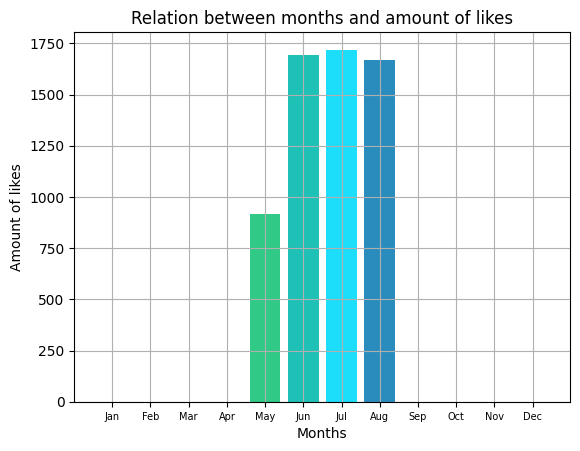

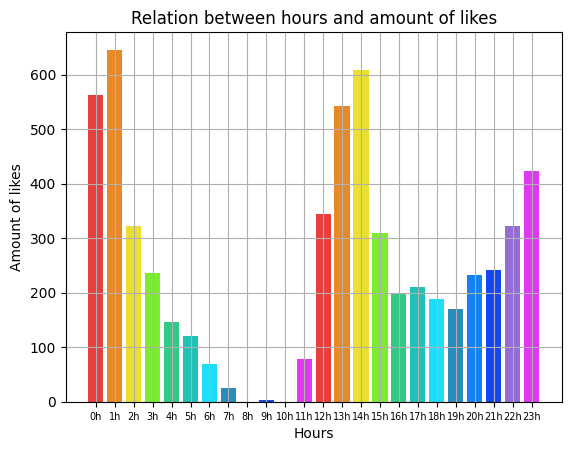

In [396]:
m_likes, h_likes = months_and_hours_review(like_list, "likes", "amount of likes")

### Amount of searchs

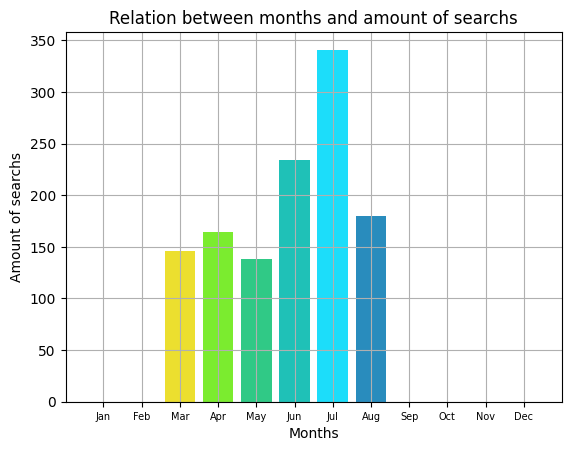

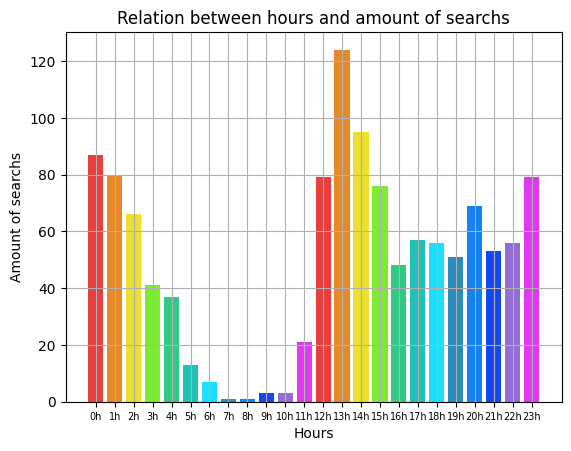

In [397]:
m_search, h_search = months_and_hours_review(search_history, "searchs", "amount of searchs")

### Amount of shares

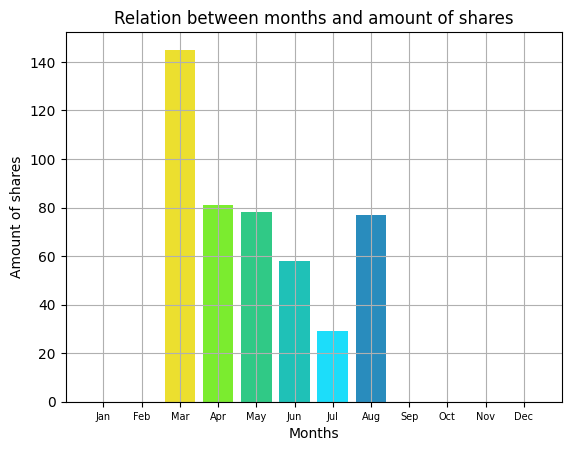

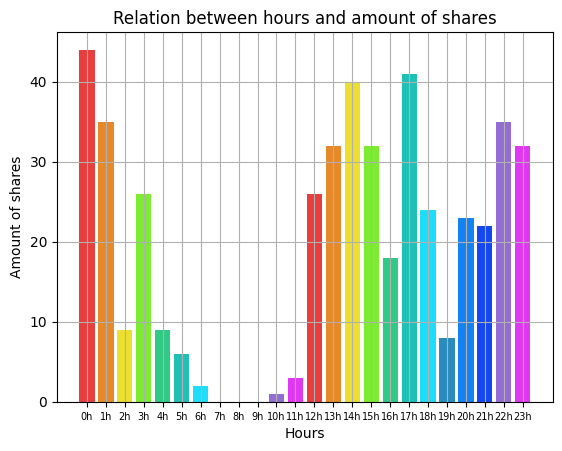

In [398]:
m_share, h_share = months_and_hours_review(share_history, "shares", "amount of shares")

### Amount of watched videos

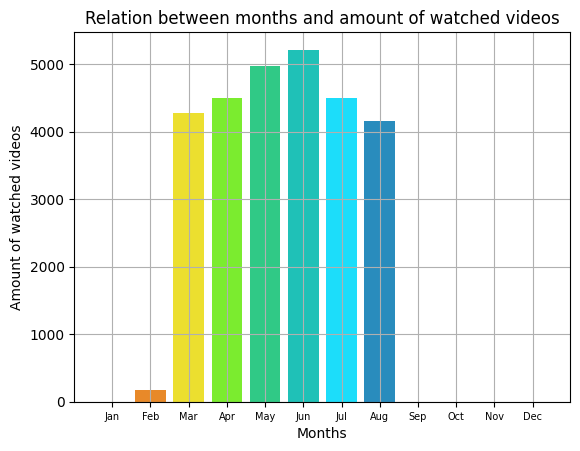

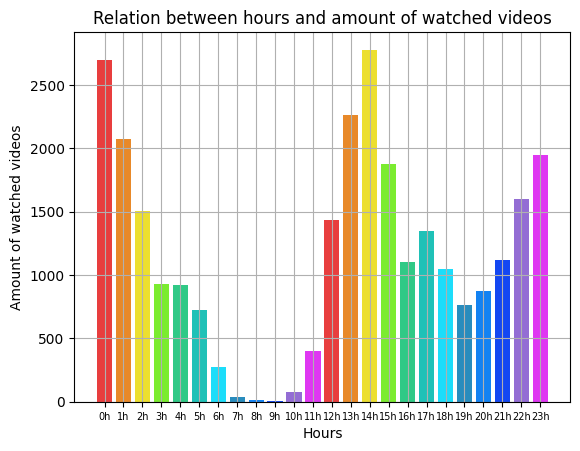

In [399]:
m_video, h_video = months_and_hours_review(video_browsing_history, "watched videos", "amount of watched videos")

### Amount of logins

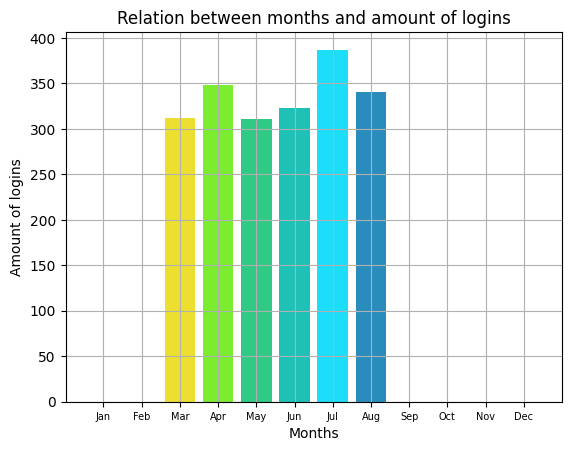

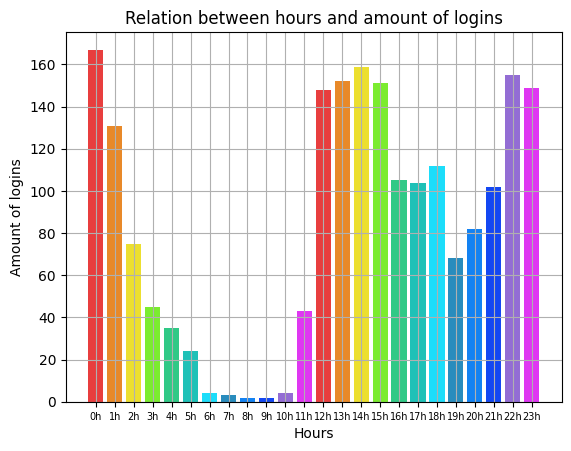

In [400]:
months_and_hours_review(login_history, "logins", "amount of logins", return_data=False)

### Logins x Network type

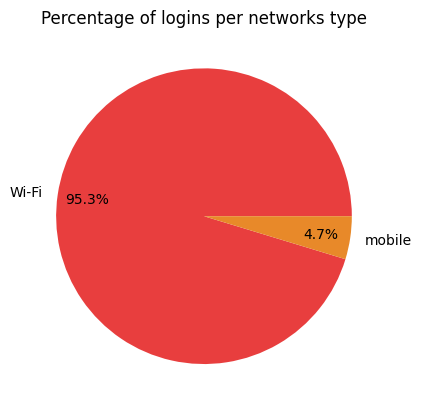

In [401]:
pie_review(login_history, 'NetworkType', "logins per networks type")

### Relation [Videos per hour x Likes per hour]

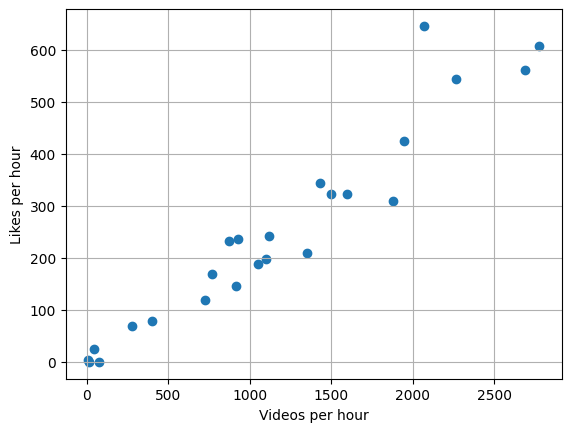

In [402]:
check_relation(h_video, h_likes, "Videos per hour", "Likes per hour")

- Based on the graph, it is noticeable that Likes per hour and Videos per hour have a strong and positive correlation; so it is a linear correlation.

### Relation [Likes per hour x Shares per hour]

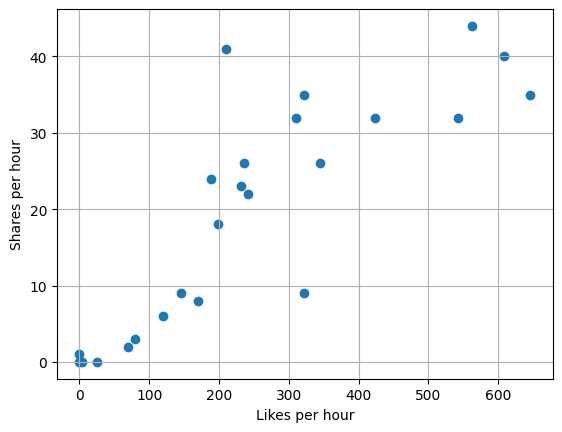

In [403]:
check_relation(h_likes, h_share, "Likes per hour", "Shares per hour")

- Based on the graph, it is noticeable that likes per hour and videos per hour have a waek and positive correlation; so it is not a linear correlation.

### Relation [Searchs per hour x Videos per hour]

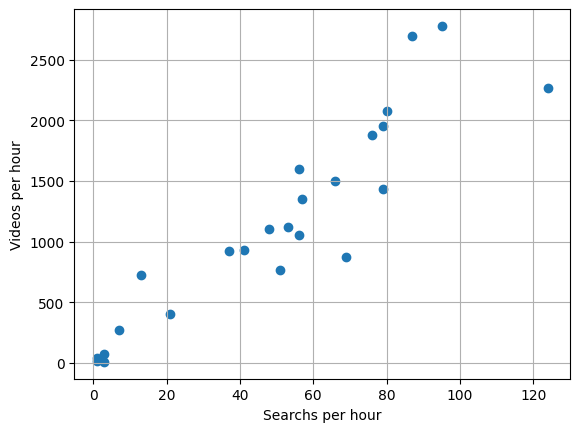

In [404]:
check_relation(h_search, h_video, "Searchs per hour", "Videos per hour")

- Based on the graph, it is noticeable that Videos per hour and Searchs per hour have a strong and positive correlation; so it is a linear correlation.

## Measures

In [405]:
search_term = unique(search_history, 'SearchTerm')
print(f"I've searched {len(search_term)} different terms on tiktok")

I've searched 1038 different terms on tiktok


## Storing data

In [406]:
# storing variables for later

data.guard['Favorites'] = {'M': m_fav, 'H': h_fav}
data.guard['Search'] = {'M' : m_search, 'H' : h_search}
data.guard['Share'] = {'M': m_share, 'H': h_share}
data.guard['Watched'] = {'M' : m_video}

# ADS

## Setting data

In [407]:
# declaring variables

ads_activity = np.array(data.ads['Off TikTok Activity']['OffTikTokActivityDataList'])

## Graphs

### Amount of ads

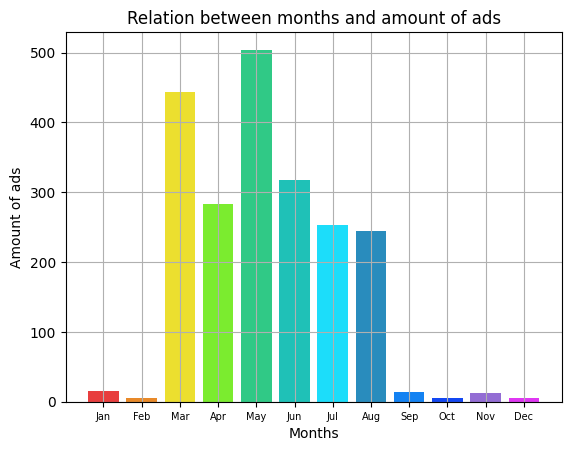

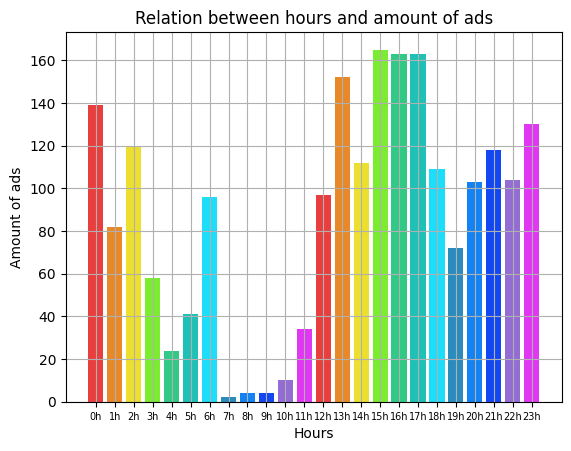

[array([ 15,   5, 444, 283, 504, 317, 253, 244,  14,   5,  13,   5]),
 array([139,  82, 120,  58,  24,  41,  96,   2,   4,   4,  10,  34,  97,
        152, 112, 165, 163, 163, 109,  72, 103, 118, 104, 130])]

In [408]:
months_and_hours_review(ads_activity, "ads", "amount of ads", target_label='TimeStamp')

### Reactions to ads

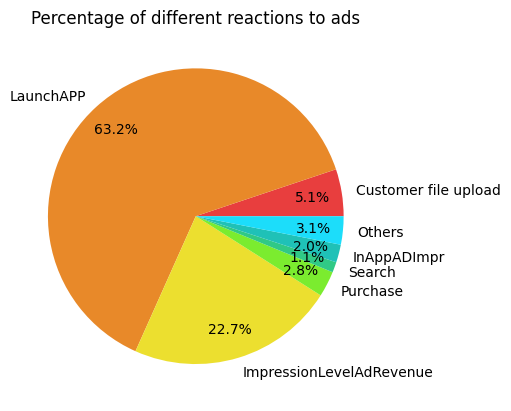

In [409]:
pie_review(ads_activity, 'Event', "different reactions to ads")

## Measures

In [410]:
sources = unique(ads_activity, 'Source')

print(f"I've had {len(sources)} different source-ads on tiktok")

I've had 52 different source-ads on tiktok


# HYPOTESES

## Hypotesis 1

#### Context

- The times and months when I receive the most messages tend to be the same times when I send the most messages
- Two-sided hypotesis
- H0: the times and months for receiving/sending messages are different
- HA: the times and months for receiving/sending messages are the same
- 5% significance level

#### Hours

In [411]:
s_hip1_h, p_hip1_h = stats.pearsonr(data.guard['Messages']['H'][0], data.guard['Messages']['H'][1])
hypotesis_analysis(s_hip1_h, p_hip1_h, "Pearson correlation coefficient")

Pearson correlation coefficient : 0.9029
P-value : 0.0000
The null hypotesis is rejected



- Based on P-value, the H0 is rejected and the Pearson correlation coefficient is close to 1, indicating a strong and positive correlation between the messages received and the messages sents on the context of hours.

#### Months

In [412]:
s_hip1_m, p_hip1_m = stats.pearsonr(data.guard['Messages']['M'][0], data.guard['Messages']['M'][1])
hypotesis_analysis(s_hip1_m, p_hip1_m, "Pearson correlation coefficient")

Pearson correlation coefficient : 0.8485
P-value : 0.0005
The null hypotesis is rejected



- Based on P-value, the H0 is rejected and the Pearson correlation coefficient is close to 1, indicating a strong (not strong as the correlation on the context of hours) and positive correlation between the messages received and the messages sents on the context of months.

#### Conclusion

- We can conclude that the months and hours of receiving messages and the sending messages are the same and they are strongly and positively correlated on both contexts, but on the context of hours this correlation is stronger.

## Hypotesis 2

#### Context

- The times and months when I share the most tend to be the same times when I research the most
- Two-sided hypotesis
- H0: sharing/search times and months are different
- HA: sharing/search times and months are the same
- 5% significance level

#### Hours

In [413]:
s_hip2_h, p_hip2_h = stats.pearsonr(data.guard['Share']['H'], data.guard['Search']['H'])
hypotesis_analysis(s_hip2_h, p_hip2_h, "Pearson correlation coefficient")

Pearson correlation coefficient : 0.8373
P-value : 0.0000
The null hypotesis is rejected



- Based on P-value, the H0 is rejected and the Pearson correlation coefficient is close to 1, indicating a strong and positive correlation between the shares and the searchs on the context of hours.

#### Months

In [414]:
s_hip2_m, p_hip2_m = stats.pearsonr(data.guard['Share']['M'], data.guard['Search']['M'])
hypotesis_analysis(s_hip2_m, p_hip2_m, "Pearson correlation coefficient")

Pearson correlation coefficient : 0.5752
P-value : 0.0504
The null hypotesis is not rejected



- Based on P-value, the H0 is not rejected and the Pearson correlation coefficient is close to 0.5, indicating that the shares an the searchs are not correlated on the context of months.

#### Conclusion

- We can conclude that the shares and the searchs sent are strongly and positively correlated on the context of hours, but on the context of months there are not evidences to indicate such a correlation.

- We can conclude that the hours of the shares and the searchs are the same and they are strongly and positively correlated on this context, but the months of the shares and the searchs aren't the same because they aren't correlated at all.

## Hypotesis 3

#### Context

- The proportion of liked videos is similar to the proportion of non-liked videos
- Two-sided hypotesis
- H0: the proportion of liked videos is the same as the proportion of non-liked videos
- HA: the proportion of liked videos is different to the proportion of non-liked videos
- 5% significance level

#### Result

In [415]:
# amount of liked video [march - august]
liked_videos = len(np.array(data.activity['Like List']['ItemFavoriteList']))

# amount of watched videos [march - august] (data.guard['Watched']['M'][1] : videos watched on february)
watched_videos = len(np.array(data.activity['Video Browsing History']['VideoList'])) - liked_videos - data.guard['Watched']['M'][1]

s_hip3, p_hip3 = proportions_ztest(
    np.array([liked_videos, watched_videos]),
    np.array([liked_videos + watched_videos, liked_videos + watched_videos]),
    alternative='two-sided'
)

hypotesis_analysis(s_hip3, p_hip3, "Z-Statistic")

Z-Statistic : -132.9425
P-value : 0.0000
The null hypotesis is rejected



- Based on P-value, the H0 is rejected and the Z-Statistics is negative and have a great magnetude, indicating that the proportion of liked videos is significantly lower than the proportion of non-liked videos.

#### Conclusion

- We can conclude that is significantly more likely that I won't like the video instead of liking it, based on the P-value and the Z-Statistic.